###The Sparks Foundation- Data Science & Buisness Analytics Internship 

##Task 1 - Presiction using supervised Machine Learning 

Name: **D A Santhosh**

In [2]:
# Importing all libraries required in this notebook
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt  
%matplotlib inline

In [3]:
# Reading data from remote link
url = "http://bit.ly/w-data"
std_data = pd.read_csv(url)
print("Data imported successfully")



Data imported successfully


In [5]:
#Reading the data set
std_data.head(10)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [7]:
#number of rows and column in the data set
std_data.shape

(25, 2)

In [66]:
#To check null or missing values in the Data Set 
std_data.isnull().sum()


Hours     0
Scores    0
dtype: int64

In [67]:
std_data.isnull == True

False

# **Visualizing the Dataset using a Graph**

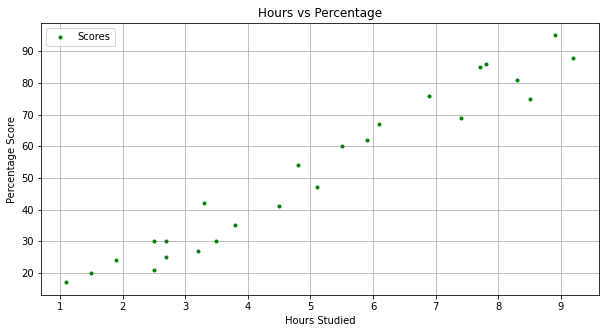

In [20]:
# Plotting the distribution of scores
plt.rcParams['figure.figsize'] = [10,5]
std_data.plot(x='Hours', y='Scores',color='green',style='.')  
plt.title('Hours vs Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  
plt.grid()
plt.show()

**From the graph above, we can clearly see that there is a positive linear relation between the number of hours studied and percentage of score.**

# **Data preparation**

In [28]:
#assigning iloc function we divide the data into attributes and labels
X = std_data.iloc[:, :-1].values  
Y = std_data.iloc[:, 1].values  

In [29]:
X

array([[2.5],
       [5.1],
       [3.2],
       [8.5],
       [3.5],
       [1.5],
       [9.2],
       [5.5],
       [8.3],
       [2.7],
       [7.7],
       [5.9],
       [4.5],
       [3.3],
       [1.1],
       [8.9],
       [2.5],
       [1.9],
       [6.1],
       [7.4],
       [2.7],
       [4.8],
       [3.8],
       [6.9],
       [7.8]])

In [30]:
Y

array([21, 47, 27, 75, 30, 20, 88, 60, 81, 25, 85, 62, 41, 42, 17, 95, 30,
       24, 67, 69, 30, 54, 35, 76, 86])

# **Spliting the data into training data and testing data**

In [31]:
from sklearn.model_selection import train_test_split  
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, 
                            test_size=0.2, random_state=0) 

### **Training the Algorithm**


In [32]:
from sklearn.linear_model import LinearRegression  
regressor = LinearRegression()  
regressor.fit(X_train, Y_train) 

print("Training complete.")

Training complete.


# **Plotting the regression line**

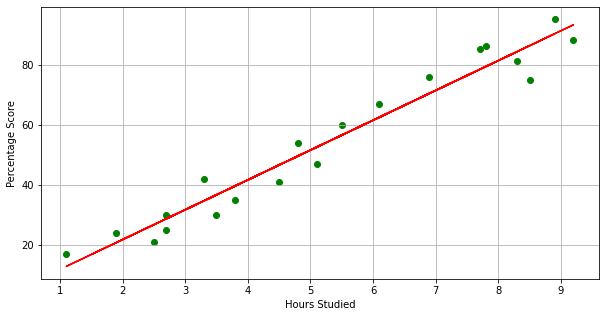

In [38]:
line = regressor.coef_*X+regressor.intercept_

# Plotting for the test data
plt.rcParams['figure.figsize'] = [10,5]
plt.scatter(X_train,Y_train,color='green')
plt.plot(X,line,color='red') 
plt.xlabel('Hours Studied')
plt.ylabel('Percentage Score')
plt.grid()
plt.show()

### **Making Predictions**


In [39]:
print(X_test) # Testing data - In Hours
Y_pred = regressor.predict(X_test) # Predicting the scores

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


In [42]:
#Actual values
Y_test

array([20, 27, 69, 30, 62])

In [43]:
#Predicted values
Y_pred

array([16.88414476, 33.73226078, 75.357018  , 26.79480124, 60.49103328])

In [44]:
# Comparing Actual vs Predicted
df = pd.DataFrame({'Actual': Y_test, 'Predicted': Y_pred})  
df 

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


# **Testing with the values asked in the question ,where hours = 9.5**

In [59]:
hours = 9.25
own_pred = regressor.predict([[hours]])
print("The predicted score if a student studies for",hours,
"hours is",own_pred[0])


The predicted score if a student studies for 9.25 hours is 93.69173248737539


In [63]:
# test with another data(own value)
hours = 7.86
own_pred = regressor.predict([[hours]])
print("The predicted score if a student studies for",hours,
"hours is",own_pred[0])

The predicted score if a student studies for 7.86 hours is 79.91591997928268


### **Evaluating the model**



In [61]:
from sklearn import metrics  
print('Mean Absolute Error:', 
      metrics.mean_absolute_error(Y_test, Y_pred)) 

Mean Absolute Error: 4.183859899002982
